In [1]:
import pandas as pd

<h3>sales_history.csv - история продаж</h3>

'salerevenuerub' - продажи в руб.,

'soldpieces' - в шт.,

'skutertiaryid' - уникальный идентификатор товара,

'posid' - уникальный идентификатор магазина,

'sale_dt' - дата продажи (данные понедельные),


<h3>promo_history.xlsx - история промо-акций</h3>

'start_dttm' - дата начала акции,

'end_dttm' - дата окончания акции,

'skutertiaryid' - уникальный идентификатор товара,

'promotypeid' - тип промо-акции,

'chaindiscountvalue' - размер скидки.


In [2]:
sales = pd.read_csv('sales_history.csv')

In [3]:
promo = pd.read_excel('promo_history.xlsx')

In [4]:
promo.drop(columns=['Unnamed: 0', 0], inplace=True)
sales.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
sales['price'] = sales['salerevenuerub']/sales['soldpieces']

In [6]:
import datetime
sales['sale_dt'] = sales['sale_dt'].apply(lambda x: datetime.datetime.fromisoformat(x))

In [7]:
sales[sales['sale_dt'] == datetime.datetime.fromisoformat('2018-06-18')]

,salerevenuerub,soldpieces,skutertiaryid,posid,sale_dt,price
460539,848.552160,11,7182,293136,2018-06-18,77.141105
460545,318.812400,4,7182,296833,2018-06-18,79.703100
460551,772.197900,33,7189,293136,2018-06-18,23.399936
460554,46.798800,2,7189,296833,2018-06-18,23.399400
460556,596.572600,25,7193,293136,2018-06-18,23.862904
...,...,...,...,...,...,...
864476,43.456413,7,7247,318763,2018-06-18,6.208059
864480,128.033998,22,7247,295964,2018-06-18,5.819727
864483,153.675821,22,7247,295975,2018-06-18,6.985265
864486,12.416118,2,7247,298891,2018-06-18,6.208059


In [8]:
len(sales['skutertiaryid'].unique())

10

In [9]:
promo

,start_dttm,end_dttm,skutertiaryid,promotypeid,chaindiscountvalue
0,2019-01-16,2019-01-29,7205,67,0.228495
1,2019-01-16,2019-01-29,7234,67,0.239229
2,2019-02-13,2019-02-26,7182,70,0.233531
3,2019-02-13,2019-02-26,7205,67,0.221040
4,2019-02-13,2019-02-26,7234,67,0.216858
...,...,...,...,...,...
98,2021-06-09,2021-06-15,7247,70,0.150000
99,2021-06-30,2021-07-06,7189,70,0.300000
100,2021-06-30,2021-07-06,7194,70,0.300000
101,2021-06-30,2021-07-06,7205,70,0.250000


In [10]:
for index, i in promo.iterrows():
    l = len(sales[(sales['sale_dt'] < i['end_dttm']) & (i['start_dttm'] < sales['sale_dt'])])
    print(f"For {index} promo ({i['start_dttm']}-{i['end_dttm']}) has {l} sales.")

For 0 promo (2019-01-16 00:00:00-2019-01-29 00:00:00) has 162540 sales.
For 1 promo (2019-01-16 00:00:00-2019-01-29 00:00:00) has 162540 sales.
For 2 promo (2019-02-13 00:00:00-2019-02-26 00:00:00) has 190430 sales.
For 3 promo (2019-02-13 00:00:00-2019-02-26 00:00:00) has 190430 sales.
For 4 promo (2019-02-13 00:00:00-2019-02-26 00:00:00) has 190430 sales.
For 5 promo (2019-03-13 00:00:00-2019-03-26 00:00:00) has 200060 sales.
For 6 promo (2019-03-13 00:00:00-2019-03-26 00:00:00) has 200060 sales.
For 7 promo (2019-03-13 00:00:00-2019-03-26 00:00:00) has 200060 sales.
For 8 promo (2019-04-10 00:00:00-2019-04-23 00:00:00) has 215547 sales.
For 9 promo (2019-04-10 00:00:00-2019-04-23 00:00:00) has 215547 sales.
For 10 promo (2019-04-10 00:00:00-2019-04-23 00:00:00) has 215547 sales.
For 11 promo (2019-04-24 00:00:00-2019-05-07 00:00:00) has 302526 sales.
For 12 promo (2019-05-07 00:00:00-2019-05-07 00:00:00) has 0 sales.
For 13 promo (2019-05-08 00:00:00-2019-05-14 00:00:00) has 108208 

In [11]:
month_sales = sales['sale_dt'].apply(lambda x: x.month)

In [12]:
import matplotlib.pyplot as plt
from collections import Counter

In [46]:
def get_sales_for_year_and_month(df, year=2018, month_start='01', month_end=12):
    return df[(df['sale_dt'] >= datetime.datetime.fromisoformat(f'{year}-{month_start}-01')) & (df['sale_dt'] <= datetime.datetime.fromisoformat(f'{year}-{month_end}-30'))]

In [14]:
def get_promo_for_year_and_month(df, year=2019, month='01'):
    return df[(df['start_dttm'] >= datetime.datetime.fromisoformat(f'{year}-{month}-01')) & (df['end_dttm'] <= datetime.datetime.fromisoformat(f'{year}-{month}-28'))]

In [15]:
month_promos = {}
for m in range(1, 13):
    c = 0
    for y in [2018, 2019, 2020, 2021]:
        c += len(get_promo_for_year_and_month(promo, year=y, month=f'{m}'.zfill(2)))
    month_promos[m] = c

<h3>Получаем месяцы продаж и рисуем график, чтобы лучше узнать данные и попробовать увидеть сезонность</h3>

In [16]:
month_sales_2018 = get_sales_for_year_and_month(sales, year=2018)['sale_dt'].apply(lambda x: x.month) 
month_sales_2019 = get_sales_for_year_and_month(sales, year=2019)['sale_dt'].apply(lambda x: x.month) 
month_sales_2020 = get_sales_for_year_and_month(sales, year=2020)['sale_dt'].apply(lambda x: x.month) 
month_sales_2021 = get_sales_for_year_and_month(sales, year=2021)['sale_dt'].apply(lambda x: x.month) 

month = ['Янв', "Фев", "Март", "Апр", "Май", "Июн", "Июл", "Авг", "Сен", "Окт", "Ноя", "Дек"]

month_sales_count_2018 = dict(Counter(month_sales_2018))
month_sales_count_2018 = [month_sales_count_2018.setdefault(i, 0) for i in range(1, 13)]

month_sales_count_2019 = dict(Counter(month_sales_2019))
month_sales_count_2019 = [month_sales_count_2019.setdefault(i, 0) for i in range(1, 13)]

month_sales_count_2020 = dict(Counter(month_sales_2020))
month_sales_count_2020 = [month_sales_count_2020.setdefault(i, 0) for i in range(1, 13)]

month_sales_count_2021 = dict(Counter(month_sales_2021))
month_sales_count_2021 = [month_sales_count_2021.setdefault(i, 0) for i in range(1, 13)]


In [17]:
import numpy as np

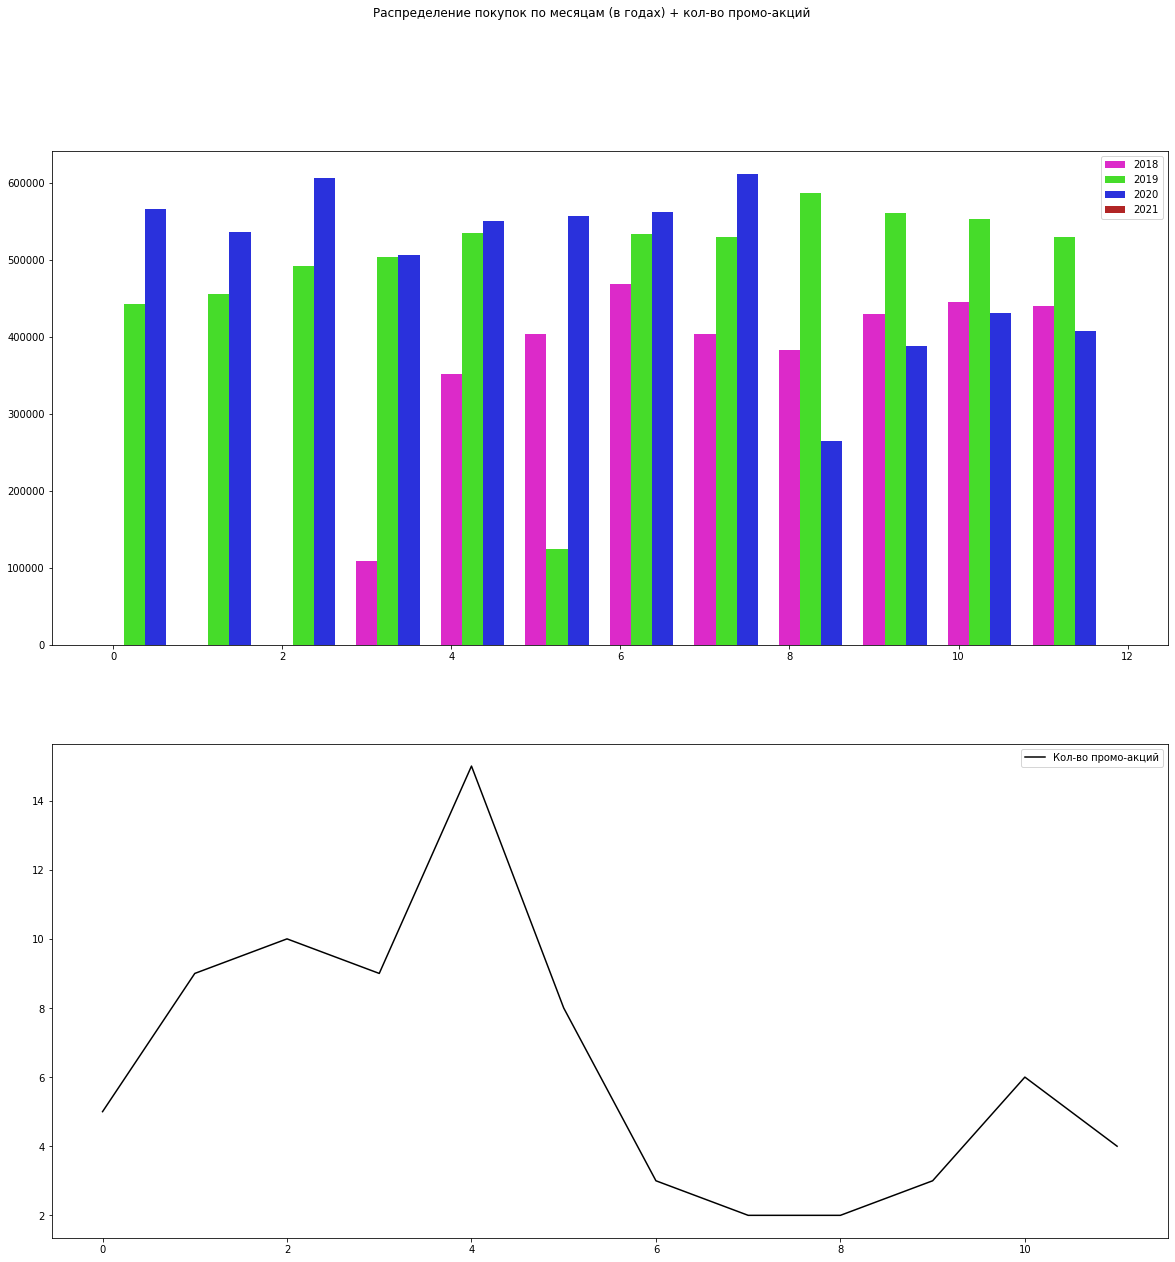

In [18]:

fig, axs = plt.subplots(2, figsize=(20,20))
fig.suptitle('Распределение покупок по месяцам (в годах) + кол-во промо-акций')

X = np.arange(12)
axs[0].bar(X+0.0, month_sales_count_2018, color='#DC2AC9', width = 0.25)
axs[0].bar(X+0.25, month_sales_count_2019, color='#46DC2A', width = 0.25)
axs[0].bar(X+0.5, month_sales_count_2020, color='#2A31DC', width = 0.25)
axs[0].bar(X+0.75, month_sales_count_2021, color='#B12525', width = 0.25)

axs[1].plot(X, month_promos.values(), color='black')

axs[0].legend(labels=['2018', '2019', '2020', '2021'])

axs[1].legend(labels=["Кол-во промо-акций"])

plt.show()

In [41]:
get_sales_for_year_and_month(sales, year=2019)

,salerevenuerub,soldpieces,skutertiaryid,posid,sale_dt,price
3433244,89.205000,1,7182,293136,2019-01-21,89.205000
3433245,89.205000,1,7182,293136,2019-01-28,89.205000
3433246,267.615000,3,7182,293136,2019-01-14,89.205000
3433247,400.425000,5,7182,293136,2019-01-07,80.085000
3433248,730.455000,11,7182,293136,2019-01-01,66.405000
...,...,...,...,...,...,...
9277909,51.530018,8,7247,276248,2019-12-23,6.441252
9277910,55.174770,9,7247,276248,2019-12-01,6.130530
9277911,128.825046,20,7247,276248,2019-12-16,6.441252
9277912,238.328899,37,7247,276248,2019-12-09,6.441322


In [56]:
get_sales_for_year_and_month(sales, year=2019, month_start='04', month_end='04')

,salerevenuerub,soldpieces,skutertiaryid,posid,sale_dt,price
4823797,265.620000,4,7182,293136,2019-04-29,66.405000
4823798,597.838800,7,7182,293136,2019-04-15,85.405543
4823799,939.451200,11,7182,293136,2019-04-08,85.404655
4823800,1129.078800,15,7182,293136,2019-04-22,75.271920
4823801,1281.075000,15,7182,293136,2019-04-01,85.405000
...,...,...,...,...,...,...
5327123,106.790569,16,7247,276248,2019-04-15,6.674411
5327124,106.790569,16,7247,276248,2019-04-29,6.674411
5327125,113.465621,17,7247,276248,2019-04-08,6.674448
5327126,126.814792,19,7247,276248,2019-04-01,6.674463


In [57]:
get_promo_for_year_and_month(promo, year=2019, month='04')

,start_dttm,end_dttm,skutertiaryid,promotypeid,chaindiscountvalue
8,2019-04-10,2019-04-23,7193,70,0.184665
9,2019-04-10,2019-04-23,7205,70,0.154356
10,2019-04-10,2019-04-23,7234,70,0.142418


In [68]:
def check_sale_in_promo_period(sale_date):
    if isinstance(sale_date, str):
        sale_date = datetime.datetime.fromisoformat(sale_date)
    promo_in_period = promo[(promo['start_dttm'] <= sale_date) & (promo['end_dttm'] >= sale_date)]
    return not promo_in_period.empty, promo_in_period

In [77]:
for m in range(1, 13):
    l = len(get_sales_for_year_and_month(sales, year=2019, month_start=f'{m}'.zfill(2)))
    print(check_sale_in_promo_period(f'2019-' + str(m).zfill(2) + '-01'), l)

(False, Empty DataFrame
Columns: [start_dttm, end_dttm, skutertiaryid, promotypeid, chaindiscountvalue]
Index: []) 5844670
(False, Empty DataFrame
Columns: [start_dttm, end_dttm, skutertiaryid, promotypeid, chaindiscountvalue]
Index: []) 5402044
(False, Empty DataFrame
Columns: [start_dttm, end_dttm, skutertiaryid, promotypeid, chaindiscountvalue]
Index: []) 4946511
(False, Empty DataFrame
Columns: [start_dttm, end_dttm, skutertiaryid, promotypeid, chaindiscountvalue]
Index: []) 4454117
(True,    start_dttm   end_dttm  skutertiaryid  promotypeid  chaindiscountvalue
11 2019-04-24 2019-05-07           7182           70            0.198616) 3950786
(False, Empty DataFrame
Columns: [start_dttm, end_dttm, skutertiaryid, promotypeid, chaindiscountvalue]
Index: []) 3416306
(True,    start_dttm   end_dttm  skutertiaryid  promotypeid  chaindiscountvalue
21 2019-06-06 2019-07-03           7193           77            0.152973
22 2019-06-26 2019-07-02           7182           70            0.1462